In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
clubs = pd.read_csv('/content/Clubs_prices_2017-2024.csv')
players = pd.read_csv('/content/Players_prices_2017-2024.csv')

In [11]:
clubs.shape

(780, 7)

In [12]:
players.shape

(28838, 6)

# Clubs

In [13]:
clubs.head()

,Unnamed: 0,ligue,year,club,mean_age,num_foreigns,price
0,0,premier-league,2017,Manchester City,25.5,22.0,1010.00
1,1,premier-league,2017,Chelsea FC,25.3,33.0,884.25
2,2,premier-league,2017,Liverpool FC,25.4,21.0,857.50
3,3,premier-league,2017,Manchester United,26.6,23.0,849.50
4,4,premier-league,2017,Tottenham Hotspur,25.2,22.0,829.60


In [15]:
## Пропусков нет
## Отрицательных значений также нет

clubs.isna().sum()
clubs[clubs['price'] < 0].shape[0]

0

## Изучение распределений признаков

Text(0, 0.5, 'Club price')

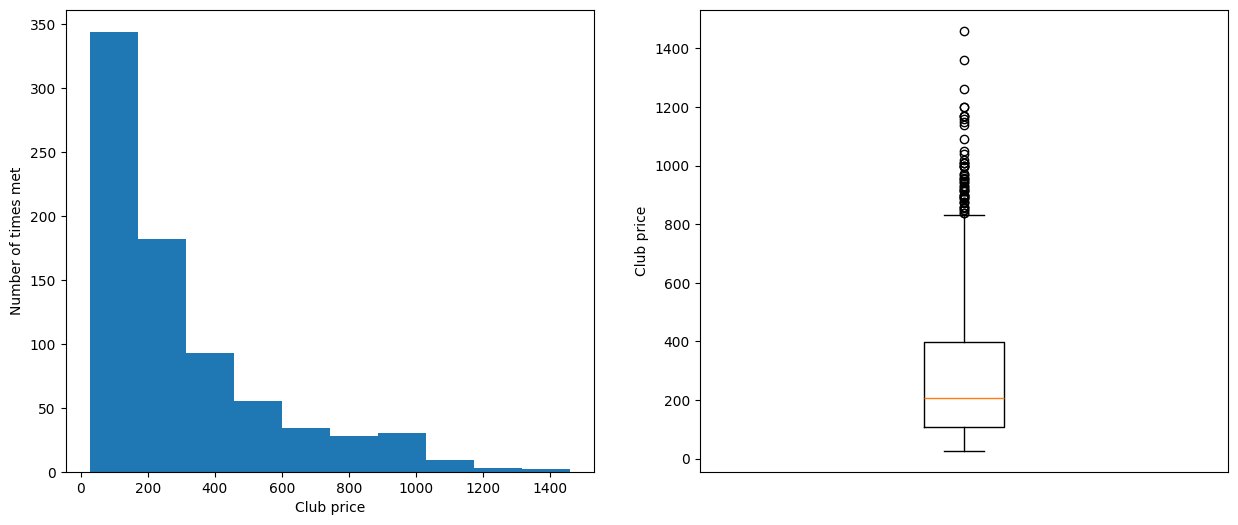

In [21]:
## Стоимость имеет лог-нормальное распределение
fig, axes = plt.subplots(1, 2, figsize=(15,6))

axes[0].hist(clubs['price'])
axes[0].set_xlabel('Club price')
axes[0].set_ylabel('Number of times met')

axes[1].boxplot(clubs['price'])
axes[1].set_xticks([])
axes[1].set_ylabel('Club price')

Text(0, 0.5, 'Mean age of players')

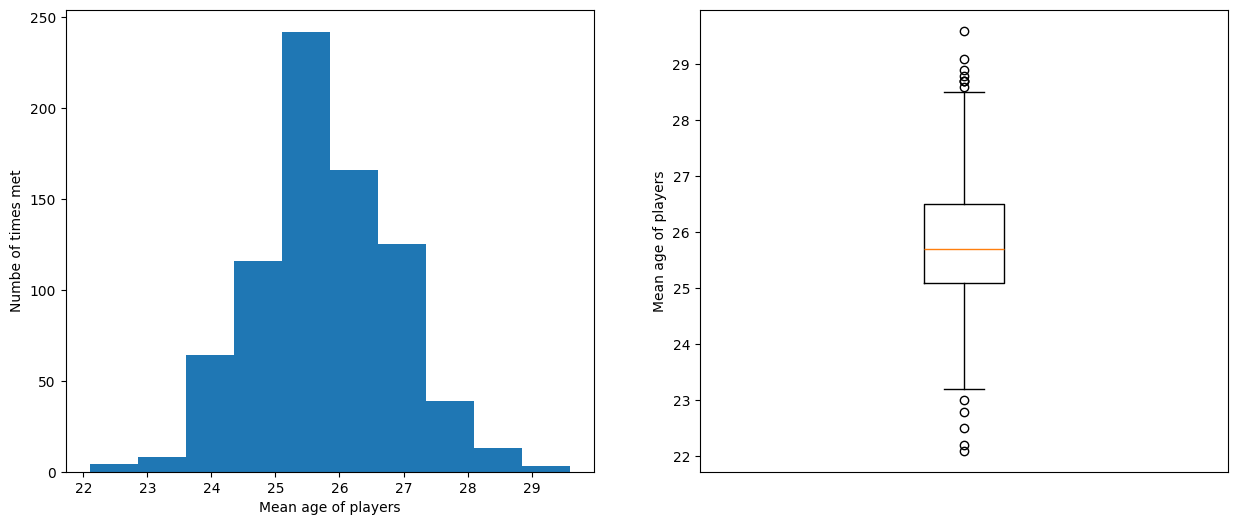

In [22]:
## Выбросы есть, но средний возраст команд распределен около-нормально
## с легкими хвостами
fig, axes = plt.subplots(1, 2, figsize=(15,6))

axes[0].hist(clubs['mean_age'])
axes[0].set_xlabel('Mean age of players')
axes[0].set_ylabel('Numbe of times met')

axes[1].boxplot(clubs['mean_age'])
axes[1].set_xticks([])
axes[1].set_ylabel('Mean age of players')

Text(0, 0.5, 'Number of foreign players')

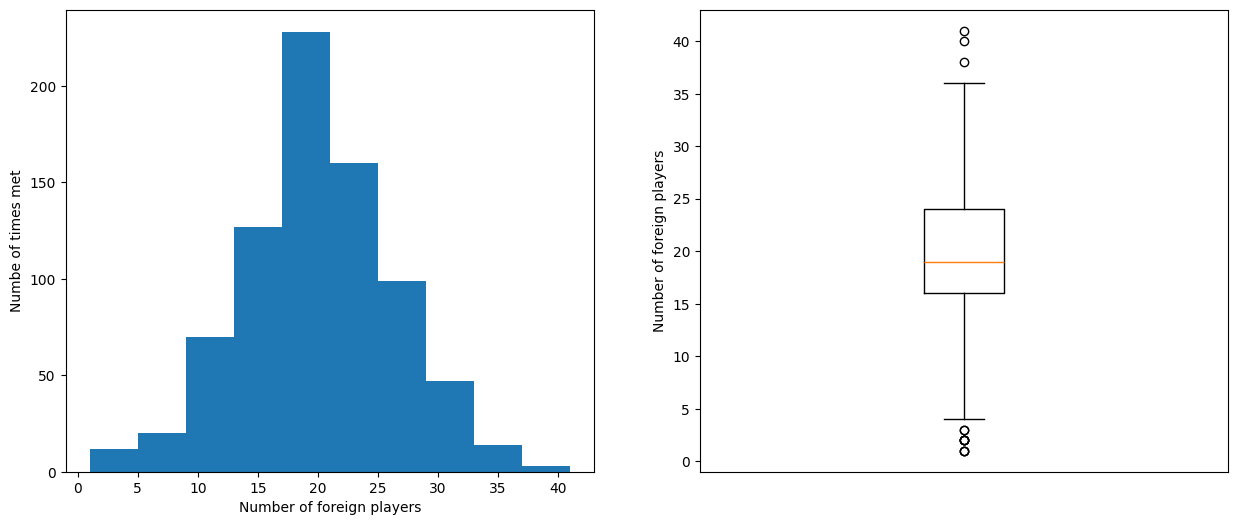

In [23]:
## Выбросы есть, но количество легионеров в командах распределено около-нормально
## с легкими хвостами
fig, axes = plt.subplots(1, 2, figsize=(15,6))

axes[0].hist(clubs['num_foreigns'])
axes[0].set_xlabel('Number of foreign players')
axes[0].set_ylabel('Numbe of times met')

axes[1].boxplot(clubs['num_foreigns'])
axes[1].set_xticks([])
axes[1].set_ylabel('Number of foreign players')

## Проверка гипотез

Text(0.5, 1.0, 'Prices of clubs yearly')

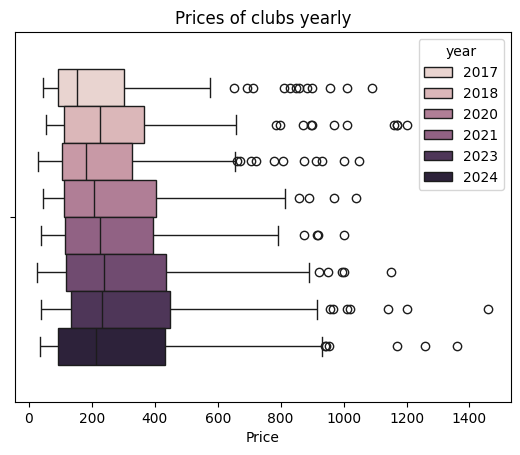

In [138]:
## Заметим, что наиболее дорогие клубы выделяются за последние 3 года
## Это связано с резким подорожанием нападающих
## Несмотря на это медианная цена выглядит сходим образом, хотя в 2018 году наибольшая с отрывом

sns.boxplot(data=clubs, x="price", hue="year")
plt.xlabel('Price')
plt.title('Prices of clubs yearly')

Text(0.5, 1.0, 'Prices of clubs in each league')

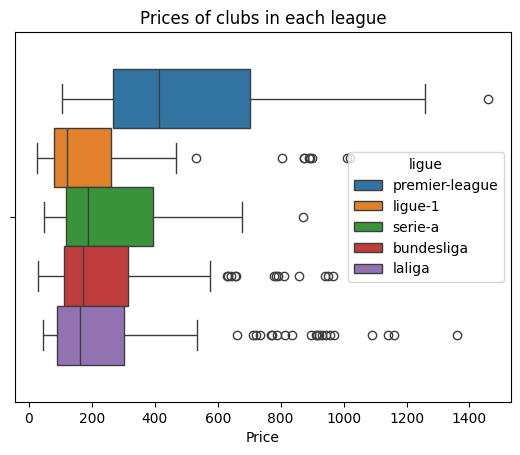

In [137]:
## Заметим, что наибольшая медианная стоимость клубов в Английской премьер-лиге
## Второе место занимает Серия А, затем Бундеслига, Ла Лига и Лига 1
## Опираясь на наличие выбросов, можно сделать следующий выводы:
## 1) разброс в стоимостях клубов во всех лигах кроме Серии А значительный
## это связано с наличием топ-клубов в каждой лиге, которые регулярно выигрывают чемпионат
## С другой стороны, в АПЛ нет регулярного победителя, поэтому разброс объясняется
## высокой стоимостью нескольких топ-клубов, которые корректируют правый ус боксплота

sns.boxplot(data=clubs, x="price", hue="ligue")
plt.xlabel('Price')
plt.title('Prices of clubs in each league')

Text(0.5, 1.0, 'Number of foreign players in clubs in each league')

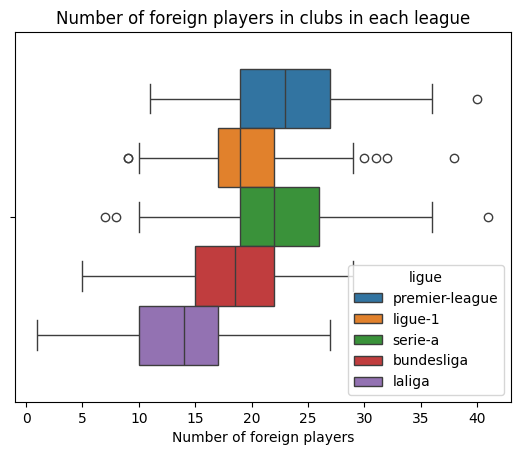

In [147]:
## По графику заметно, что больше всего легионеров в АПЛ, меньше всего -- в Ла Лиге

sns.boxplot(data=clubs, x="num_foreigns", hue="ligue")
plt.xlabel('Number of foreign players')
plt.title('Number of foreign players in clubs in each league')

In [56]:
max_costs = []

for ligue in clubs['ligue'].unique():
    for year in clubs['year'].unique():
        max_cost = clubs[
            (clubs['ligue'] == ligue) & (clubs['year'] == year)
        ][['price', 'club']].sort_values(by='price').iloc[-1]
        max_costs.append([ligue, year, max_cost.values[0], max_cost.values[1]])

In [71]:
max_costs_pd = pd.DataFrame(max_costs, columns=['ligue', 'year', 'price', 'club'])

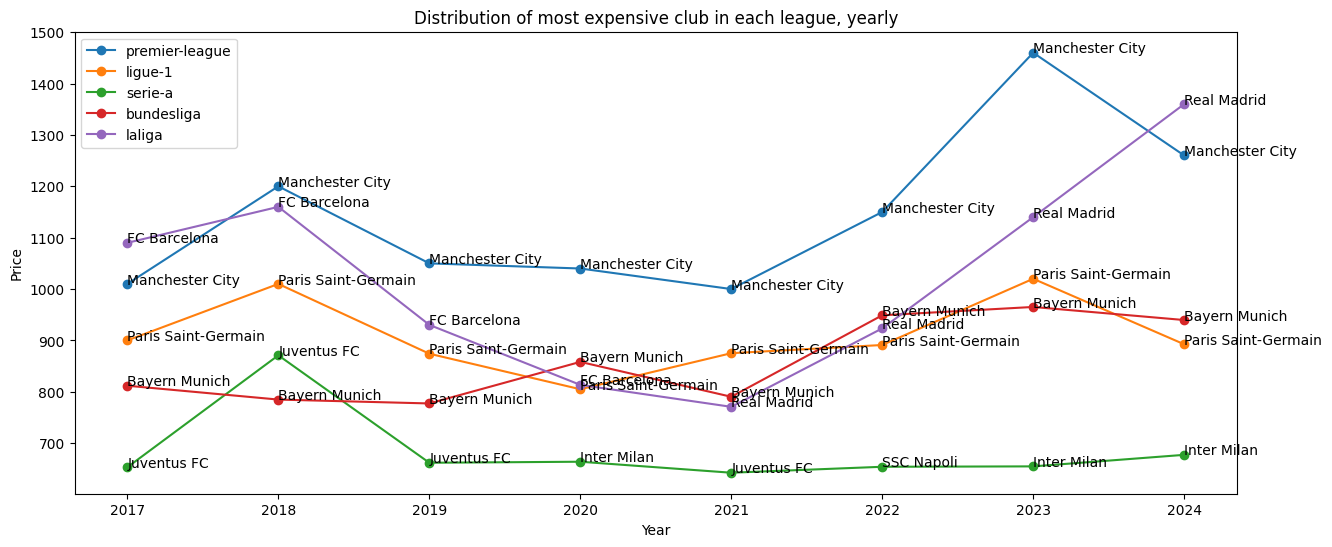

In [134]:
## Обратим внимание, что во всех лигах кроме итальянской самые дорогие клубы одни и те же
## За исключением испанской, где Реал Мадрид сменил Барселону
## Также стоимости самых дорогих итальянских клубов также самые низкие,
## что объясняет наименьший разброс в стоимости клубов

plt.figure(figsize=(15,6))

for ligue in max_costs_pd['ligue'].unique():
    mask = max_costs_pd['ligue'] == ligue
    plt.plot(
        max_costs_pd[mask]['year'],
        max_costs_pd[mask]['price'],
        marker = 'o',
        label = ligue
        )
    for i, txt in enumerate(max_costs_pd[mask]['year'].tolist()):
        plt.annotate(
            max_costs_pd[mask]['club'].tolist()[i],
             (max_costs_pd[mask]['year'].tolist()[i],
              max_costs_pd[mask]['price'].tolist()[i])
             )
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Distribution of most expensive club in each league, yearly')

plt.legend()
plt.show()

In [66]:
## Заметим, что самые дорогие клубы за 8 лет стабильно либо из АПЛ, либо из Ла Лиги
## Интересно то, что из АПЛ представлены самые разные клубы:
## Манчестер Сити, Арсенал, Ливерпуль, Челси -- это объясняется высокой конкуренцией за титул
## Однако Манчестер Сити чаще остальных встречается в этом списке
## это связано с большими инвестициями владельцев в этот клуб

clubs.sort_values(by='price', ascending=False).head(10)

,Unnamed: 0,ligue,year,club,mean_age,num_foreigns,price
120,120,premier-league,2023,Manchester City,25.7,21.0,1460.0
760,760,laliga,2024,Real Madrid,27.1,17.0,1360.0
140,140,premier-league,2024,Manchester City,27.7,16.0,1260.0
20,20,premier-league,2018,Manchester City,24.6,36.0,1200.0
121,121,premier-league,2023,Arsenal FC,24.6,23.0,1200.0
21,21,premier-league,2018,Liverpool FC,25.2,25.0,1170.0
22,22,premier-league,2018,Chelsea FC,26.2,40.0,1170.0
141,141,premier-league,2024,Arsenal FC,26.4,18.0,1170.0
640,640,laliga,2018,FC Barcelona,25.2,20.0,1160.0
100,100,premier-league,2022,Manchester City,26.0,21.0,1150.0


Text(0, 0.5, 'Club price')

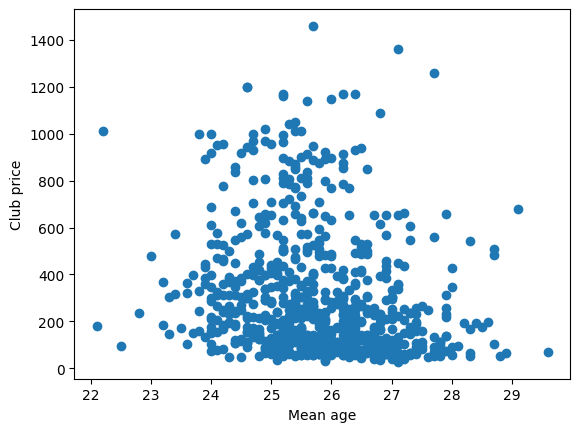

In [19]:
## По графику видно, что средний возраст игроков команды нелинейно связан со стоимостью

plt.scatter(clubs['mean_age'], clubs['price'])
plt.xlabel('Mean age')
plt.ylabel('Club price')

Text(0, 0.5, 'Club price')

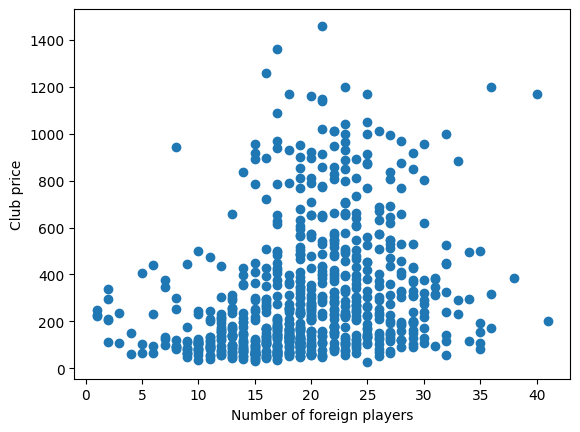

In [20]:
## По графику видно, что количество легионеров в команде нелинейно связано со стоимостью

plt.scatter(clubs['num_foreigns'], clubs['price'])
plt.xlabel('Number of foreign players')
plt.ylabel('Club price')

# Players

In [159]:
players.head()

,Unnamed: 0,ligue,year,club,name,price
0,0,premier-league,2017,Manchester City,Ederson,50.0
1,1,premier-league,2017,Manchester City,Joe Hart,10.0
2,2,premier-league,2017,Manchester City,Claudio Bravo,3.5
3,3,premier-league,2017,Manchester City,Angus Gunn,2.0
4,4,premier-league,2017,Manchester City,John Stones,50.0


In [160]:
## Пропусков нет

players.isna().sum()

,0
Unnamed: 0,0
ligue,0
year,0
club,0
name,0
price,0


In [161]:
## Пропусков нет, но есть - -- это обозначение отсутствия цены у игрока
## Природа пропуска -- недолгое пребывание в команде, отсутствие истории игр
## Поступим просто -- заполним пропуски значением 0

players['price'].value_counts()

,count
price,
-,1432
2.0,1195
1.0,1130
3.0,1055
1.5,1038
...,...
0.375,1
95.0,1
99.0,1


In [162]:
players['price'] = players['price'].apply(lambda x: 0 if x == '-' else float(x))

Text(0, 0.5, 'Football player price')

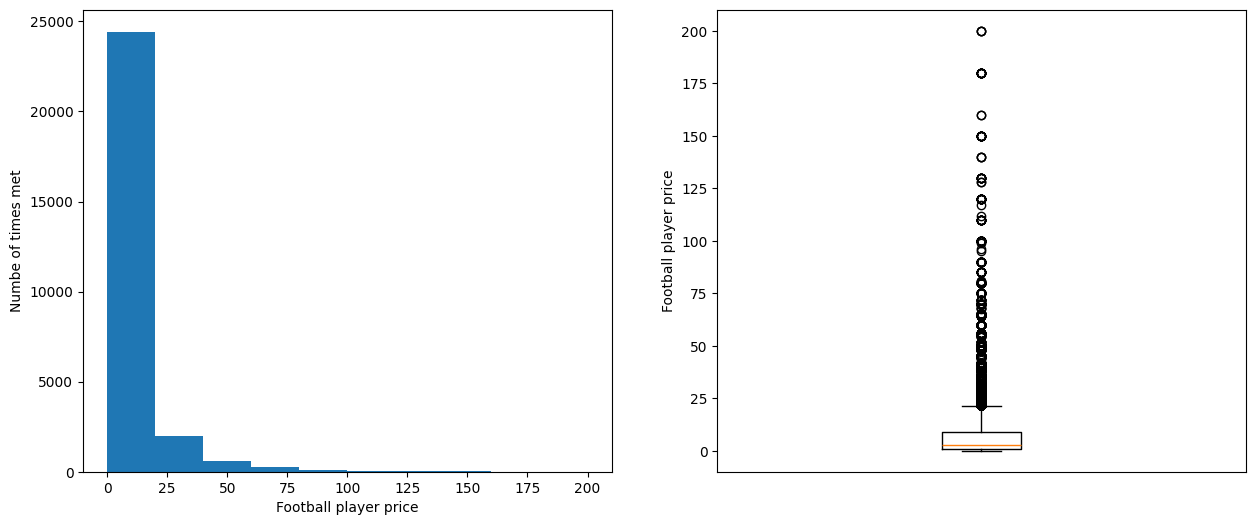

In [205]:
## На графиках присутствует множество выбросов

fig, axes = plt.subplots(1, 2, figsize=(15,6))

axes[0].hist(players['price'])
axes[0].set_xlabel('Football player price')
axes[0].set_ylabel('Numbe of times met')

axes[1].boxplot(players['price'])
axes[1].set_xticks([])
axes[1].set_ylabel('Football player price')

<Axes: xlabel='price'>

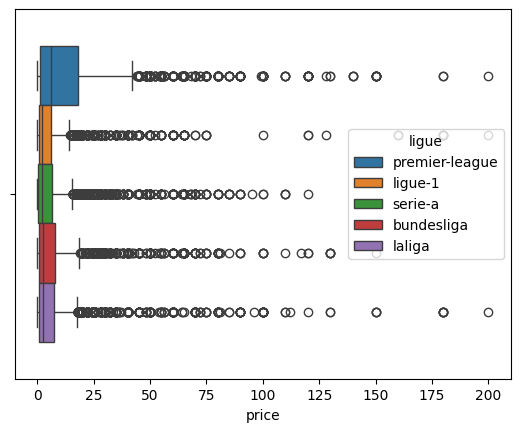

In [190]:
## Обратим внимание, что наибольший разброс в стоимостях наибольший у АПЛ, Лиги 1 и Ла Лиги
## С другой стороны, наименьший разброс у Бундеслиги и Серии А

sns.boxplot(data=players, x="price", hue="ligue")

<Axes: xlabel='price'>

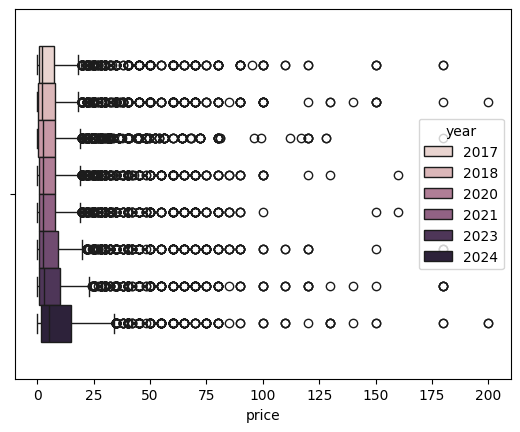

In [191]:
## Распределения стоимостей игроков также выглядят устойчиво с течением времени
## Стоит отметить, что постепенно увеличивается верхний квартиль и ус,
## Что говорит о росте цен футболистов

sns.boxplot(data=players, x="price", hue="year")

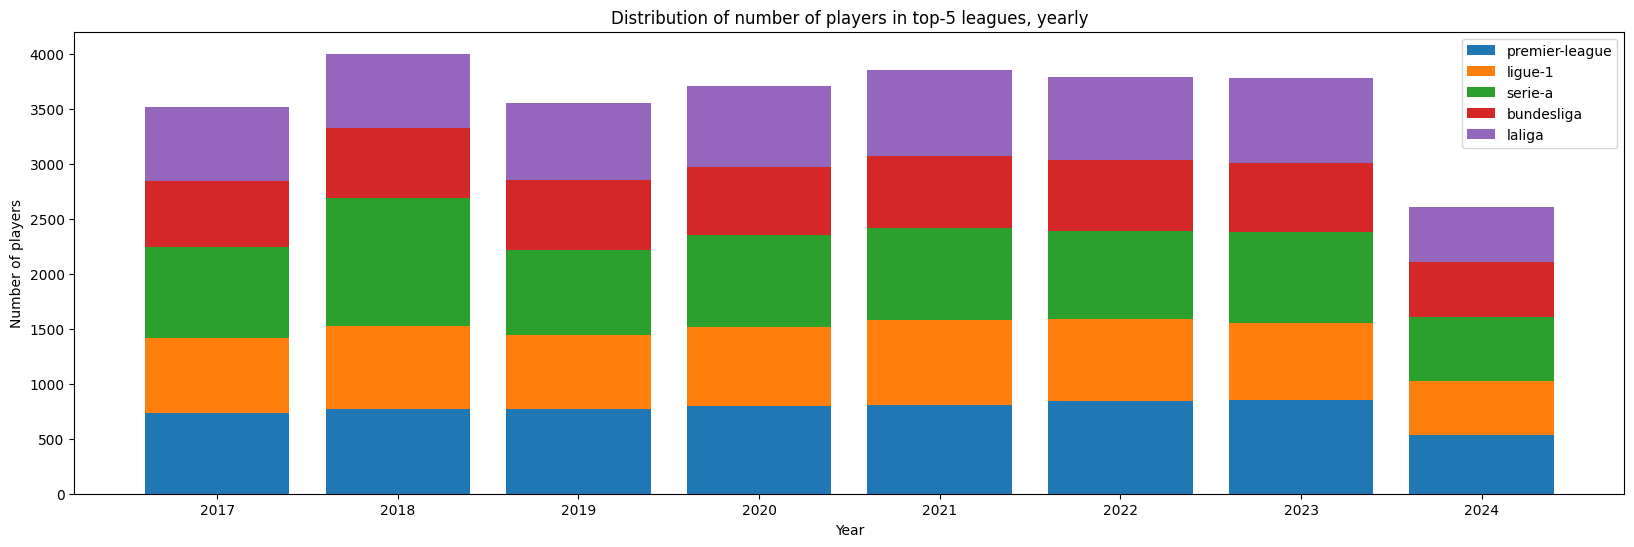

In [203]:
## Распределения каждого сезона выглядят схожим образом за исключением Серии А 2018 года
## В этом случае количество игроков в лиге было выше обычного

plt.figure(figsize=(20,6))

bottom = np.array([0]* 8)
for ligue in players['ligue'].unique():
    counts = players[players['ligue'] == ligue]['year'].value_counts().sort_index()
    plt.bar(
        counts.index,
        counts.values,
        bottom=bottom,
        label=ligue
    )

    bottom += counts.values

plt.xlabel('Year')
plt.ylabel('Number of players')
plt.title('Distribution of number of players in top-5 leagues, yearly')
plt.legend()

In [216]:
## Заметим, что наиболее дорогие игроки встречаются в трех лигах
## Чаще всего наиболее дорогие игроки встречаются в клубах ПСЖ и Реал Мадрид
## Также важное место играет Манчестер Сити

## Интересно, что некоторые игроки попадают дважды в список (Vinicius Junior, Neymar, Kylian Mbappé, Erling Haaland)

players.sort_values(by='price', ascending=False).head(10)

,Unnamed: 0,ligue,year,club,name,price
6831,6831,ligue-1,2018,Paris Saint-Germain,Kylian Mbappé,200.0
28353,28353,laliga,2024,Real Madrid,Vinicius Junior,200.0
5604,5604,premier-league,2024,Manchester City,Erling Haaland,200.0
6140,6140,ligue-1,2017,Paris Saint-Germain,Neymar,180.0
9750,9750,ligue-1,2022,Paris Saint-Germain,Kylian Mbappé,180.0
23261,23261,laliga,2017,FC Barcelona,Lionel Messi,180.0
27593,27593,laliga,2023,Real Madrid,Vinicius Junior,180.0
27590,27590,laliga,2023,Real Madrid,Jude Bellingham,180.0
6826,6826,ligue-1,2018,Paris Saint-Germain,Neymar,180.0
3917,3917,premier-league,2022,Manchester City,Erling Haaland,180.0


In [229]:
max_costs = []

for ligue in players['ligue'].unique():
    for year in players['year'].unique():
        max_cost = players[
            (players['ligue'] == ligue) & (players['year'] == year)
        ][['price', 'name']].sort_values(by='price').iloc[-1]
        max_costs.append([ligue, year, max_cost.values[0], max_cost.values[1]])

In [230]:
max_costs_pd = pd.DataFrame(max_costs, columns=['ligue', 'year', 'price', 'name'])

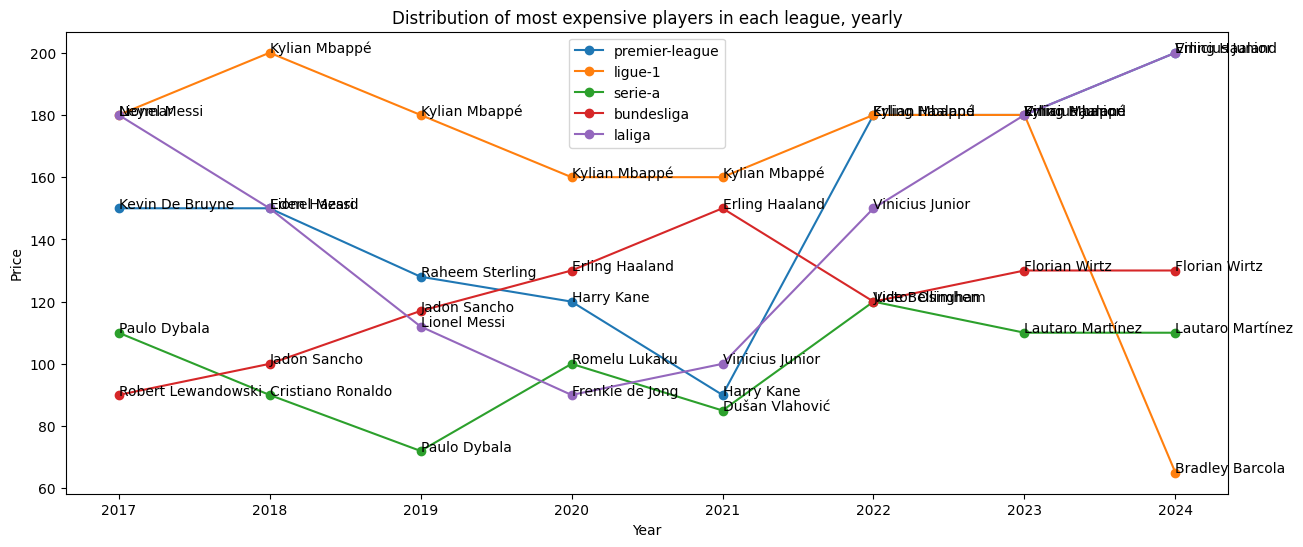

In [232]:
## Наименее дорогие игроки находятся в Серии А, наиболее дорогие -- в Лиге 1
## В 2021 году видна просадка в стоимости сразу у трех лиг
## Просадка в 2024 году в Лиге 1 связана с трансфером Мбаппе в Реал Мадрид из ПСЖ

plt.figure(figsize=(15,6))

for ligue in max_costs_pd['ligue'].unique():
    mask = max_costs_pd['ligue'] == ligue
    plt.plot(
        max_costs_pd[mask]['year'],
        max_costs_pd[mask]['price'],
        marker = 'o',
        label = ligue
        )
    for i, txt in enumerate(max_costs_pd[mask]['year'].tolist()):
        plt.annotate(
            max_costs_pd[mask]['name'].tolist()[i],
             (max_costs_pd[mask]['year'].tolist()[i],
              max_costs_pd[mask]['price'].tolist()[i])
             )
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Distribution of most expensive players in each league, yearly')

plt.legend()
plt.show()